
Full BMI Table:

   Name Gender  Age  Weight_kg  Height_m   BMI             Category
  Alice      F   23         55      1.60 21.48   Normal (18.5–24.9)
    Bob      M   34         85      1.75 27.76 Overweight (25–29.9)
Charlie      M   29         72      1.68 25.51 Overweight (25–29.9)
  David      M   45         95      1.80 29.32 Overweight (25–29.9)
    Eva      F   22         60      1.55 24.97          Obese (30+)
  Frank      M   38        105      1.78 33.14          Obese (30+)
  Grace      F   26         48      1.50 21.33   Normal (18.5–24.9)
 Hannah      F   31         62      1.63 23.34   Normal (18.5–24.9)
    Ian      M   27         90      1.82 27.17 Overweight (25–29.9)
  Julia      F   24         50      1.52 21.64   Normal (18.5–24.9)


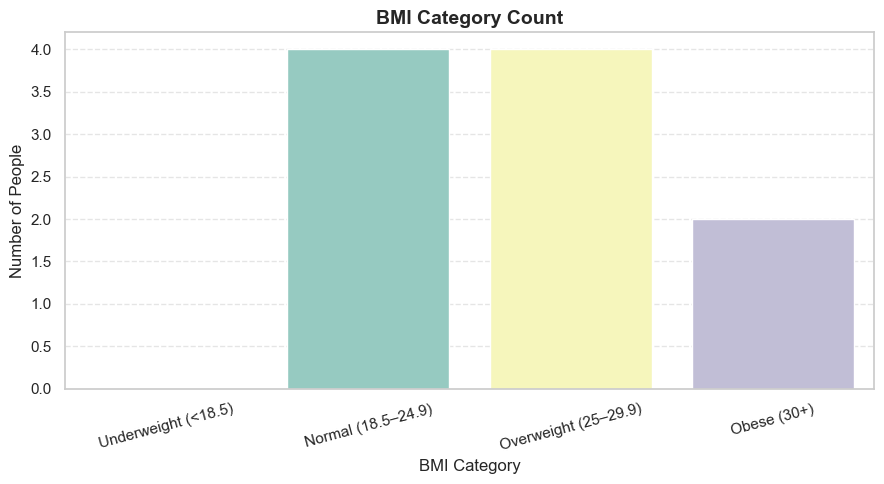

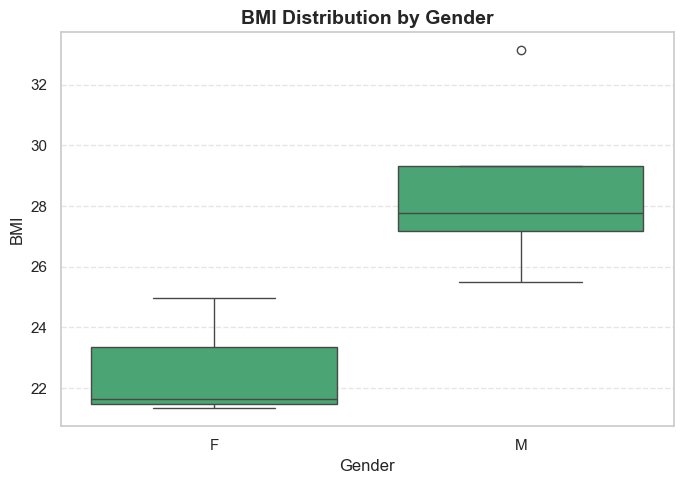

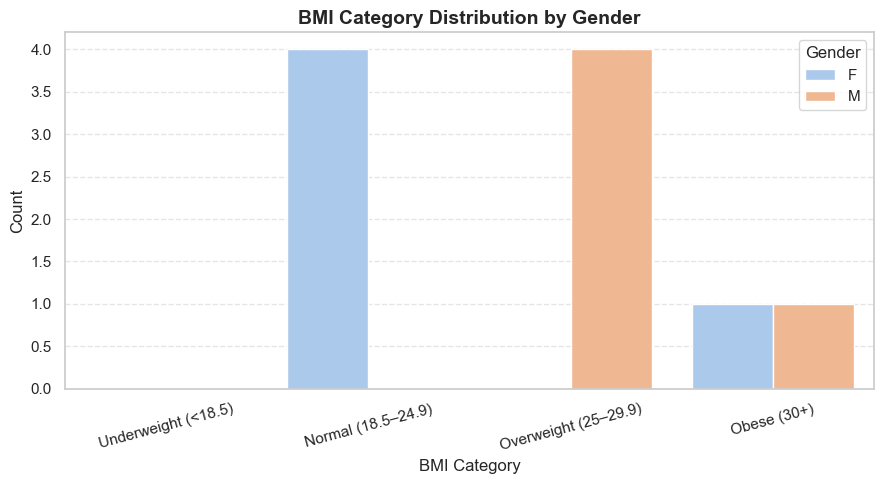

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------- 1. DATA PREPARATION ---------------------
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Julia'],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F'],
    'Age': [23, 34, 29, 45, 22, 38, 26, 31, 27, 24],
    'Weight_kg': [55, 85, 72, 95, 60, 105, 48, 62, 90, 50],
    'Height_m': [1.60, 1.75, 1.68, 1.80, 1.55, 1.78, 1.50, 1.63, 1.82, 1.52]
}

df = pd.DataFrame(data)

# --------------------- 2. BMI CALCULATION ---------------------
df['BMI'] = (df['Weight_kg'] / (df['Height_m'] ** 2)).round(2)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight (<18.5)'
    elif 18.5 <= bmi < 24.9:
        return 'Normal (18.5–24.9)'
    elif 25 <= bmi < 29.9:
        return 'Overweight (25–29.9)'
    else:
        return 'Obese (30+)'

df['Category'] = df['BMI'].apply(categorize_bmi)

# --------------------- 3. DISPLAY TABLE ---------------------
# Expand table view in notebooks
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("\nFull BMI Table:\n")
print(df.to_string(index=False))

# --------------------- 4. PLOTTING SETTINGS ---------------------
sns.set(style='whitegrid')
category_order = ['Underweight (<18.5)', 'Normal (18.5–24.9)', 'Overweight (25–29.9)', 'Obese (30+)']

# --------------------- 5. BMI CATEGORY COUNT ---------------------
plt.figure(figsize=(9, 5))
sns.countplot(
    x='Category',
    hue='Category',
    data=df,
    order=category_order,
    palette='Set3',
    legend=False  # Suppress redundant legend
)
plt.title('BMI Category Count', fontsize=14, weight='bold')
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# --------------------- 6. PLOT 2: BMI DISTRIBUTION BY GENDER ---------------------
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender', y='BMI', data=df, color='mediumseagreen')
plt.title('BMI Distribution by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------- 7. PLOT 3: BMI CATEGORY DISTRIBUTION BY GENDER ---------------------
plt.figure(figsize=(9, 5))
sns.countplot(x='Category', hue='Gender', data=df, order=category_order, palette='pastel')
plt.title('BMI Category Distribution by Gender', fontsize=14, weight='bold')
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
